# Model Evaluation and Selection for Predicting Heart Disease

#### Based on the literature the most commonly used alogrithms for prediciting heart disease are:

#### 1.Naive Bayes(Gaussian)        2.KNN        3.Support Vector Machines

#### In this project we will first:

#### 1.Split the data into a training and test set using a 70:30 split(train:test).

2.Measure unbiased estimation of each models prediction using the 10-fold crossvalidation method.

3.Build the 3 models.

4.Select the best model and then perform further feature enhancements.

### Import Libraries

In [1]:
import pandas as pd
from pandas.tools.plotting import scatter_matrix
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

%matplotlib inline

### Load and Explore the Dataset

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

In [3]:
data = pd.read_csv(url,names=['Age','Sex','cp','restbps','chol','fbs','restecg','thalach','exang',
                              'oldpeak','slope','ca','thal','num'],na_values='?',header=None)

In [4]:
# shape
data=data.dropna()
data.shape

(297, 14)

In [5]:
# Check the head of the data set to see the data types.
data.head(6)

,Age,Sex,cp,restbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


### Splitting the Data into a Training and Test Sets

In [6]:
from sklearn.model_selection import train_test_split
# Declare the independent (X) and dependent(y) variables
X= data[['Age', 'Sex', 'cp', 'restbps', 'chol', 'fbs', 'restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal']]
y= data['num']

# Split the dataset using a 70:30 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#Check the shape of each variable, remember the X variable must be in matrix form and the y varibale a vector
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((237, 13), (237,), (60, 13), (60,))

### Normalization

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
X_sc = StandardScaler()

In [9]:
X_train = X_sc.fit_transform(X_train)
X_test = X_sc.transform(X_test)

## Train the Models

In [10]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import cross_val_score

In [11]:
# Function to automate fitting and spot checking models 
def classifer(model,train_x,train_y,test,true):
    model.fit(train_x,train_y)
    prediction= model.predict(X_test)
    print(classification_report(true,prediction))
    #print('The accuracy of this model is: %s' % '{0:.3%}'.format(accuracy_score(true,prediction)))
    
    # Create confusion matrix plot
    cm = confusion_matrix(y_test,prediction)
    fig= plot_confusion_matrix(conf_mat=cm,figsize=(4,4),cmap=plt.cm.Reds,hide_spines=True)
    plt.title('Confusion Matrix',fontsize=14)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.grid('off')

    # 10-fold Cross Validation
    accuracies = cross_val_score(estimator= model,X= X_train,y=y_train,cv=10)
    print("The average model accuracy score is : %s" % "{0:.3%}".format(accuracies.mean()))
    print("The average accuracy score standard deviation is : %s" % "{0:.3%}".format(accuracies.std()))

### Support Vector Machines(SVM)

In [12]:
from sklearn.svm import SVC

             precision    recall  f1-score   support

          0       0.68      0.90      0.77        30
          1       0.14      0.08      0.11        12
          2       0.33      0.43      0.38         7
          3       0.25      0.17      0.20         6
          4       0.00      0.00      0.00         5

avg / total       0.43      0.53      0.47        60

The average model accuracy score is : 56.152%
The average accuracy score standard deviation is : 5.359%


C:\Users\Minhang Ni\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Minhang Ni\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


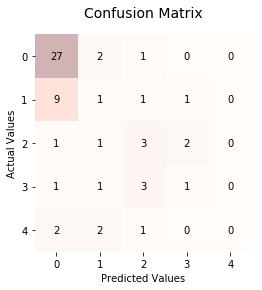

In [13]:
svc_classifier = SVC(kernel='linear')
classifer(svc_classifier,X_train,y_train,X_test,y_test)

### Naive Bayes Classifer

In [14]:
from sklearn.naive_bayes import GaussianNB

             precision    recall  f1-score   support

          0       0.77      0.90      0.83        30
          1       0.29      0.17      0.21        12
          2       0.33      0.14      0.20         7
          3       0.00      0.00      0.00         6
          4       0.08      0.20      0.12         5

avg / total       0.49      0.52      0.49        60

The average model accuracy score is : 52.326%
The average accuracy score standard deviation is : 4.998%


C:\Users\Minhang Ni\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


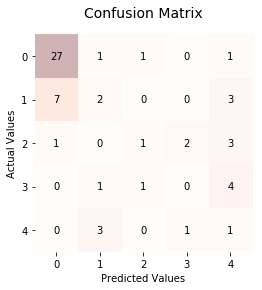

In [15]:
nb_classifier = GaussianNB()
classifer(nb_classifier,X_train,y_train,X_test,y_test)

### K-Nearest Neigbhor Classifier(KNN)

             precision    recall  f1-score   support

          0       0.70      0.93      0.80        30
          1       0.25      0.17      0.20        12
          2       0.56      0.71      0.63         7
          3       0.00      0.00      0.00         6
          4       0.00      0.00      0.00         5

avg / total       0.46      0.58      0.51        60

The average model accuracy score is : 57.423%
The average accuracy score standard deviation is : 5.313%


C:\Users\Minhang Ni\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:597: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


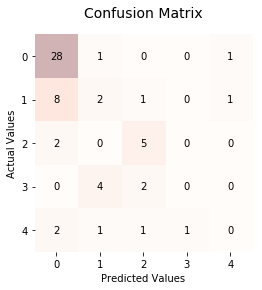

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
classifer(knn_classifier,X_train,y_train,X_test,y_test)

In [30]:
Model_comparision={'Naive Bayes':{'10-fold crossvalidaion accuracy score':'52.326%','Standard Deviation':'4.998%'},
                   'KNN':{'10-fold crossvalidaion accuracy score':'57.423%','Standard Deviation':'5.313%'},
                   'SVM':{'10-fold crossvalidaion accuracy score':'56.152%','Standard Deviation':'5.359%'}
                   }
Model_comparision = pd.DataFrame(Model_comparision)
Model_comparision

,KNN,Naive Bayes,SVM
10-fold crossvalidaion accuracy score,57.423%,52.326%,56.152%
Standard Deviation,5.313%,4.998%,5.359%


### Conclusion:

We can see that of the 3 models tested the KNN algorithm performed the best with and accuracy score of 57.423% without parameter tuning(feature selection, dimensionality reduction, etc.) and model optimization. However, this accuracy is very low,indicating that the model has not learned the set very well.

Therefore, in the next section,the study will be continued to see if we can  get an better model for predicting heart disease.